In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df= pd.read_csv('breast-cancer.csv')
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
print(df['diagnosis'])

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Using LabelEncoder: to convert diagnosis M & B  into 0 and 1 alphabetically

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
y = df['diagnosis']


# PCA visualization

# Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

In [14]:
Scaler = StandardScaler()
Scaler.fit(df)
scaled_data = Scaler.transform(df)

In [15]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [19]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)

print(x_pca.shape)

(569, 32)
(569, 2)


Text(0, 0.5, 'Second Principal Component')

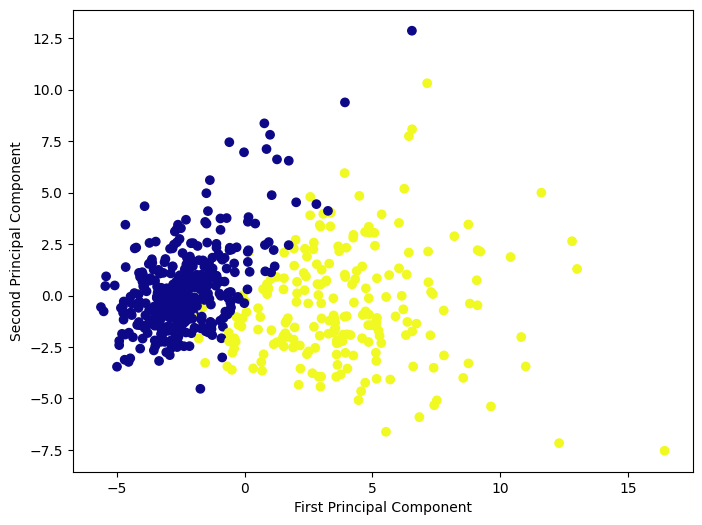

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c = y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [26]:
pca.components_

array([[ 0.02201329,  0.21683559,  0.21640403,  0.10370573,  0.22454145,
         0.21800668,  0.13749109,  0.23131053,  0.25111541,  0.25516127,
         0.13284549,  0.0577855 ,  0.20102986,  0.01546228,  0.20574033,
         0.19816935,  0.01137556,  0.1618341 ,  0.14574961,  0.17626337,
         0.03825491,  0.09502715,  0.22559681,  0.10505804,  0.23363556,
         0.2220217 ,  0.12518792,  0.20428815,  0.2229275 ,  0.24616145,
         0.12046143,  0.12652423],
       [-0.03236754, -0.07703497, -0.22604516, -0.05858664, -0.20712474,
        -0.22289674,  0.18904243,  0.15896699,  0.06817531, -0.02670216,
         0.19352523,  0.36758089, -0.09757655,  0.09077639, -0.08108218,
        -0.14407057,  0.20414373,  0.23863145,  0.20284909,  0.13667082,
         0.18572002,  0.28383027, -0.21240772, -0.04516373, -0.19209362,
        -0.21159512,  0.17272925,  0.14826692,  0.10359117, -0.00178544,
         0.14276478,  0.2767951 ]])

<Axes: >

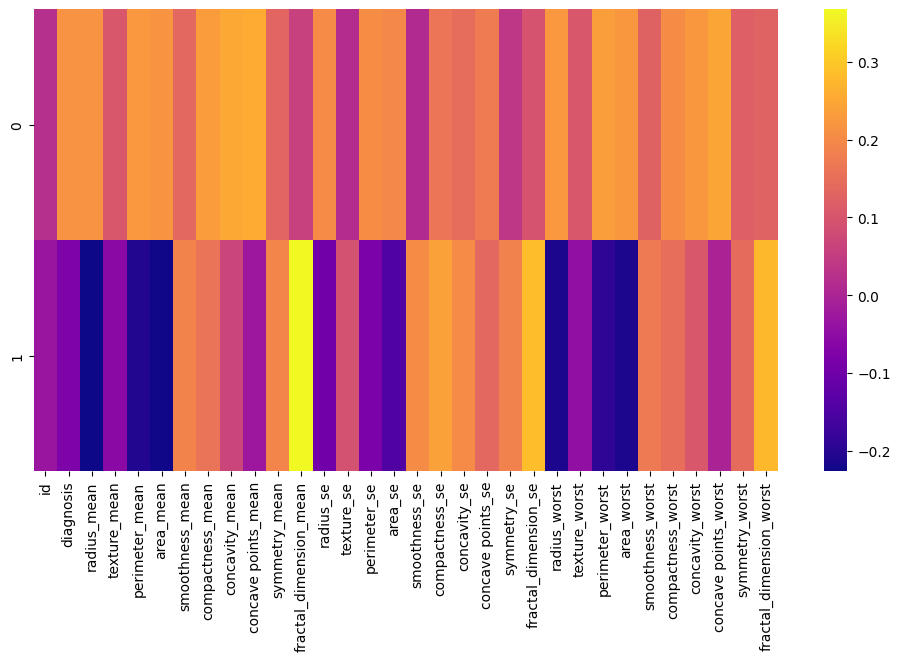

In [30]:
df_comp = pd.DataFrame(pca.components_, columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')